# Survival of Political Party Leaders: Variation Across Space Utilizing Python Libraries Folium and Geopandas and the data visualization tool Tableau

## Background Info 
Previous research into the survival of party leaders has mainly focused on the factors contributing to the party leadership tenure and consisted of either single-country studies or comparative studies focusing on (advanced) parliamentary democracies. This research studies how party leaders’ tenure varies across space and time by expanding the scope of the previous studies on this topic. It introduces a comprehensive dataset that includes a total of 2433 cases of leaders who won the position of party leader and exited the position during the 1980-2018 period (263 female and 2170 male party leaders) -with an average tenure of 5.02- as well as an additional 750 leaders who have yet to exit (101 female and 649 male) in 105 democratic countries. The data coverage is visually presented below utilizing the libraries such as folium and geopandas. 

## Data Coverage

In [1]:
pip install geopandas

  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 26.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      Failed to get options via gdal-config: [Errno 2] No such file or directory: 'gdal-config'
      A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This

In [2]:
pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 27.9 MB/s eta 0:00:00a 0:00:01
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.6 MB/s eta 0:00:00
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 14.2 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import folium

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Reading cvs file using pandas
data = pd.read_csv("PartyLeaders.csv")
data.head()

,country_id,country,election_year,continent,party_id,party_name,party_abbr,party_position,party_founded,party_dissolved,...,sex,age,cochair,in_year,out_year,tenure,status,sysofgov,sysofgov1,oecd
0,1,Albania,1991.0,Europe,1,Party of Labour of Albania,PLA,NaN,1941.0,NaN,...,M,60.0,NaN,1985.0,1991.0,6.0,0.0,0,0,0
1,1,Albania,NaN,Europe,2,Democratic Party of Albania,PD,NaN,1990.0,NaN,...,M,47.0,NaN,1991.0,1992.0,1.0,0.0,0,0,0
2,1,Albania,NaN,Europe,2,NaN,NaN,NaN,NaN,NaN,...,M,53.0,NaN,1997.0,2013.0,17.0,0.0,0,0,0
3,1,Albania,NaN,Europe,2,NaN,NaN,NaN,NaN,NaN,...,M,NaN,NaN,1992.0,1995.0,3.0,0.0,0,0,0
4,1,Albania,NaN,Europe,2,NaN,NaN,NaN,NaN,NaN,...,M,46.0,NaN,1995.0,1997.0,2.0,0.0,0,0,0


In [ ]:
# showing data types
print(data.dtypes)

country_id           int64
country             object
election_year      float64
continent           object
party_id             int64
party_name          object
party_abbr          object
party_position      object
party_founded      float64
party_dissolved    float64
leader_name         object
times               object
sex                 object
age                float64
cochair             object
in_year            float64
out_year           float64
tenure             float64
status             float64
sysofgov             int64
sysofgov1            int64
oecd                 int64
dtype: object


# Create a subset of the dataframe
The variable, ‘party leader tenure,’ is measured up to 31 December 2018. The data is right-censored because there are political party leaders who were/are still in power after the censored date. Because there are cases where the tenures of political party leaders have not yet ended, I first visually represent and descriptively analyze the data only using the cases where the end of their tenures came before the censored date. The cases where party leaders came to power during the period studied but have not left power before the censored date was left out in these analyses. 

In [ ]:
# subset data
dataevent = data[data["status"] == 0]
dataevent

,country_id,country,election_year,continent,party_id,party_name,party_abbr,party_position,party_founded,party_dissolved,...,sex,age,cochair,in_year,out_year,tenure,status,sysofgov,sysofgov1,oecd
0,1,Albania,1991.0,Europe,1,Party of Labour of Albania,PLA,NaN,1941.0,NaN,...,M,60.0,NaN,1985.0,1991.0,6.0,0.0,0,0,0
1,1,Albania,NaN,Europe,2,Democratic Party of Albania,PD,NaN,1990.0,NaN,...,M,47.0,NaN,1991.0,1992.0,1.0,0.0,0,0,0
2,1,Albania,NaN,Europe,2,NaN,NaN,NaN,NaN,NaN,...,M,53.0,NaN,1997.0,2013.0,17.0,0.0,0,0,0
3,1,Albania,NaN,Europe,2,NaN,NaN,NaN,NaN,NaN,...,M,NaN,NaN,1992.0,1995.0,3.0,0.0,0,0,0
4,1,Albania,NaN,Europe,2,NaN,NaN,NaN,NaN,NaN,...,M,46.0,NaN,1995.0,1997.0,2.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,102,Uruguay,1994.0,Americas,1948,New Space,NaN,center/center-left,1994.0,NaN,...,M,36.0,NaN,1994.0,2004.0,10.0,0.0,1,1,0
4536,103,Venezuela,NaN,Americas,1955,Communist Party of Venezuela,PCV,far-left,1931.0,NaN,...,M,67.0,NaN,1985.0,1990.0,5.0,0.0,1,1,0
4537,103,Venezuela,NaN,Americas,1955,NaN,NaN,NaN,NaN,NaN,...,M,63.0,NaN,1990.0,1996.0,6.0,0.0,1,1,0
4544,103,Venezuela,1998.0,Americas,1961,Fifth Republic Movement,MVR,left-wing/far-left,1997.0,2007.0,...,M,43.0,NaN,1997.0,2007.0,10.0,0.0,1,1,0


In [ ]:
dataevent.shape

(2867, 22)

## Average Party Leader Tenure by Country
In this section, I will explore how party leader tenure on average varies for each country and for each gender. 

In [ ]:
#average tenure for each country for the event data
average_country = dataevent.groupby('country')["tenure"].mean().to_frame('avg_tenure').reset_index().sort_values(by='avg_tenure', ascending=False) 
average_country

,country,avg_tenure
5,Bangladesh,17.000000
18,Central African Republic,13.500000
59,Lesotho,13.000000
48,Iraq,12.600000
52,Jamaica,10.333333
...,...,...
53,Japan,2.529620
69,Mexico,2.437500
92,Taiwan,2.189583
26,Czechoslovakia,2.008889


While the average party leader tenure in Bangladesh during the study period is 17, it is 1.63 in South Korea.

In [ ]:
# max avg party leader tenure by country
print(average_country[average_country.avg_tenure == average_country.avg_tenure.max()])

      country  avg_tenure
5  Bangladesh        17.0


In [ ]:
# min avg party leader tenure by country
print(average_country[average_country.avg_tenure == average_country.avg_tenure.min()])

        country  avg_tenure
87  South Korea    1.626042


## Gender Gap at the Political Party Leadership Level

There are a total of 4056 cases of leaders who won the position of party leader during the 1980-2018 period, and of those 4056 cases of party leaders, 415 were women and 3641 men.

In [ ]:
data['sex']=data['sex'].replace(['M', 'F'], ['Male', 'Female'])

In [ ]:
df = data['sex'].value_counts().rename_axis('gender').reset_index(name='counts')
df

,gender,counts
0,Male,3641
1,Female,415


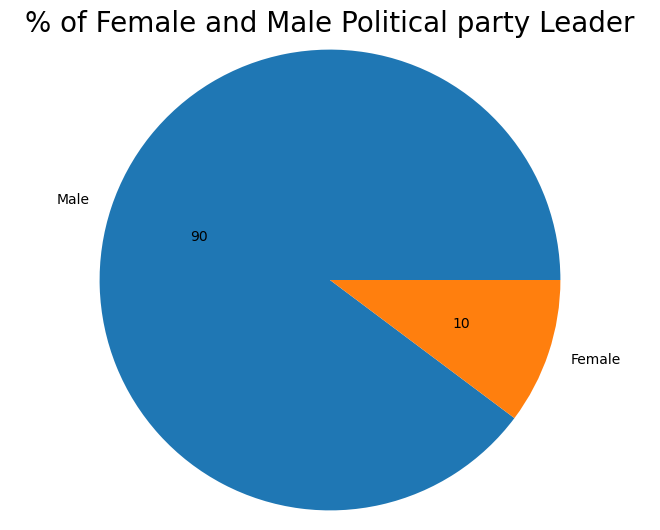

In [ ]:
#using matplotlib
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
lab = df.gender
val = df.counts
ax.pie(val, labels=lab, radius=1.2, autopct='%.f')
plt.title('% of Female and Male Political party Leader', fontsize=20)
plt.show()

In total, of those 4056 political party leaders in 105 democratic countries who came to power during the period studied, only 10% were women . The number of female party leaders relative to that of male party leaders shows clear evidence of how dire the gender gap at the party leadership level is. It suggests severe gender disparity at the top of party organizations.


## Average Party Leader Tenure by Gender

There are a total of 2867 cases of leaders who won the position of party leader and exited the position during the 1980-2018 period, and of those 2867 cases of party leaders, 283 were women and 2467 men (117 NAs).



In [ ]:
df1 = dataevent['sex'].value_counts().rename_axis('gender').reset_index(name='counts')
df1

,gender,counts
0,M,2467
1,F,283


Female political party leaders have an average tenure of 4.48 years, while their male counterparts have an average tenure of 4.98 years. Apart from the debate about why we have significantly fewer female political party leaders, it looks like when women are in the office of party leadership, their time in office is comparable to their male counterparts.

In [ ]:
#average tenure by gender for the event data
average_gender = dataevent.groupby('sex')["tenure"].mean().to_frame('avg_tenure_g').reset_index().sort_values(by='avg_tenure_g', ascending=False) 
average_gender

,sex,avg_tenure_g
1,M,4.975921
0,F,4.481109


## Average Party Leader Tenure by Age and Gender

In [ ]:
d = data.groupby('sex')['age'].mean().to_frame('avg_tenure_agegender').reset_index()
d

,sex,avg_tenure_agegender
0,Female,47.815303
1,Male,50.605874


Dividing the data into two by gender of party leaders reveals that the average age of female political party leaders is 47.8 years old, and that of male political party leaders is 50.6. 

In [ ]:
bins= [18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93]
labels = ['18-23','24-28','29-33','34-38','39-43', '43-48', '49-53', '54-58', '59-63', '64-68',
          '69-73', '74-78', '79-83','84-88', '89-93']
dataevent['AgeGroup'] = pd.cut(dataevent['age'], bins=bins, labels=labels, right=False)
print (dataevent['AgeGroup'])

0       59-63
1       43-48
2       54-58
3         NaN
4       43-48
        ...  
4529    34-38
4536    64-68
4537    64-68
4544    43-48
4551    43-48
Name: AgeGroup, Length: 2867, dtype: category
Categories (15, object): ['18-23' < '24-28' < '29-33' < '34-38' ... '74-78' < '79-83' < '84-88' < '89-93']


/var/folders/jf/qg8srjzs7d9bg9npqyhh8x1c0000gn/T/ipykernel_1672/1980905158.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
d_agegender = dataevent[["sex", "AgeGroup", "tenure", "in_year"]]

In [ ]:
d_agegender_avg = d_agegender.groupby(['sex','AgeGroup'])["tenure"].mean().to_frame('avg_tenure_agegender').reset_index()
d_agegender_avg

,sex,AgeGroup,avg_tenure_agegender
0,F,18-23,NaN
1,F,24-28,8.000000
2,F,29-33,6.000000
3,F,34-38,5.736842
4,F,39-43,5.141176
5,F,43-48,5.317308
6,F,49-53,4.412245
7,F,54-58,3.530000
8,F,59-63,2.782407
9,F,64-68,3.290909


In [ ]:
import plotly.express as px
fig = px.scatter(d_agegender_avg, x="AgeGroup", y="avg_tenure_agegender", color="sex")
fig.update_layout(
    title_text='Average Party Leader Tenure by Age and Gender'
)
fig.update_traces(marker_size=10) # to make the dots bigger

fig.show()

Above figure suggests that at early ages, there is not much difference between men and women in terms of their time in the office of party leadership, even women who became leaders of their respective political parties in their early twenties stay in the office 2 more years than men who became leaders of their respective political parties in their early twenties. However, the difference starts to emerge for women and men who became leaders of their respective political parties in their late forties. There is a negative relationship between age and party leader tenure and this relationship is more salient for women. 

## Exploring the variation in party leader tenure by creating an interactive Choropleth map Using Folium and Geopandas

In [ ]:
# Read the geopandas dataset
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


In [ ]:
# Merge the two DataFrames together
table = world.merge(average_country, how="inner", left_on=['name'], right_on=['country'])
print(table.head())

       pop_est      continent       name iso_a3  gdp_md_est  \
0     889953.0        Oceania       Fiji    FJI        5496   
1   37589262.0  North America     Canada    CAN     1736425   
2  270625568.0           Asia  Indonesia    IDN     1119190   
3   44938712.0  South America  Argentina    ARG      445445   
4   18952038.0  South America      Chile    CHL      282318   

                                            geometry    country  avg_tenure  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...       Fiji    8.000000  
1  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...     Canada    4.205556  
2  MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...  Indonesia    4.923077  
3  MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  Argentina    6.032258  
4  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...      Chile    2.869512  


In [ ]:
table.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     83 non-null     float64 
 1   continent   83 non-null     object  
 2   name        83 non-null     object  
 3   iso_a3      83 non-null     object  
 4   gdp_md_est  83 non-null     int64   
 5   geometry    83 non-null     geometry
 6   country     83 non-null     object  
 7   avg_tenure  83 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 5.8+ KB


In [ ]:
# Clean data: remove rows with no data
table = table.dropna(subset=['avg_tenure'])

In [ ]:
# Initiate a base folium map
my_map = folium.Map(location=[26, -40], zoom_start=2)
# location=[26, -40] to center the map
custom_scale = (table['avg_tenure'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()
# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['country', 'avg_tenure'],
    key_on='feature.properties.name',
# instead of using fixed value ranges for color scales, 
#we can create a custom scale using quantile() and tolist() and 
#easily pass our custom scale via the threshold_scale parameter
    threshold_scale=custom_scale, 
    fill_color='YlOrRd',
    fill_opacity=0.9,
    line_opacity=0.9,
    legend_name='Average Party Leader Tenure',
    highlight=True,
).add_to(my_map)
my_map

In [ ]:
#Add Customized Tooltips to the map
folium.features.GeoJson(
                    data=table,
                    name='Average Party Leader Tenure',
                    smooth_factor=2,
                    style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                    tooltip=folium.features.GeoJsonTooltip(
                        fields=['country',
                                'avg_tenure'
                               ],
                        aliases=["County Name:",
                                 "Average Party Leader Tenure:"
                                ], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(my_map)   

my_map

## Conclusion
There is a significant variation in party leader tenure from country to country. A map visualization, created by using the libraries Folium and Geopandas, is a good way to see how much variation there is in party leader tenure on average across space. Understanding the variation in party leaders' tenure across space is the first step to understanding the underlying systemic differences. 

This project is a part of my dissertation research. Here in this post I wanted to show how party leader tenure varies across space. To examine how their tenure varies across time, and what drives this variation, I conducted further descriptive analysis. Due to having the right censored data, any trend identified in the descriptive analyses should be taken with a grain of salt. I then analyzed the data using survival analysis, in particular the Cox’s proportional hazards model, which allowed me to address the issue of right censoring. 

When I first explored the data, I generated a dashboard with a couple of interactive graphs using the Tableau public platform. Here is the link to that dashboard.

__https://public.tableau.com/app/profile/selin8335/viz/Map-ComparativeAnalysisofPartyLeadersTenurefrom1980to2018/Dashboard1__
